In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

In [2]:
DATADIR = "/home/tasneem/Downloads/data/train1"

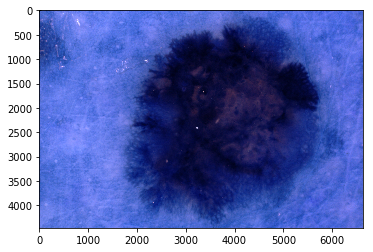

In [3]:
CATEGORIES = ["melanoma", "nevus"]

#this section for testing join path succefully- shold apear an image after run it

for category in CATEGORIES:  # do melanoma and nevi
    path = os.path.join(DATADIR,category)  # create path to melanoma and nevi
    for img in os.listdir(path):  # iterate over each image per melanoma and nevi
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_COLOR)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

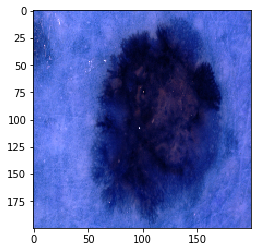

In [4]:
IMG_SIZE = 200

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show() # it will show the image in the size i written above

In [5]:

# now i began preprocessin(make train set)
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do melanoma and nevi

        path = os.path.join(DATADIR,category)  # create path to melanoma and nevi
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=melanoma 1=nevus

        for img in tqdm(os.listdir(path)):  # iterate over each image per melanoma and nevi
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_COLOR)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))
            #other way that i didnot find it helpfull for now..(:

create_training_data()

print(len(training_data))

100%|██████████| 176/176 [00:40<00:00,  6.51it/s]

352


In [6]:
import random

random.shuffle(training_data)#because of our data is orgnized so we need it

In [7]:
for sample in training_data[:10]:
    print(sample[1])#after shuffle it should be not orgized

0
0
1
0
0
0
1
0
1
0


In [8]:
X = []
y = []

for features,label in training_data: #features means images or samples
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 3))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

[[[[114 127 200]
   [107 116 191]
   [108 118 182]
   ...
   [132 132 201]
   [136 135 218]
   [128 135 214]]

  [[137 135 212]
   [108 115 184]
   [106 114 185]
   ...
   [137 137 215]
   [130 131 199]
   [128 132 214]]

  [[118 121 182]
   [118 124 198]
   [110 121 197]
   ...
   [135 134 221]
   [120 127 193]
   [134 129 221]]

  ...

  [[137 134 226]
   [140 135 228]
   [148 143 231]
   ...
   [114 117 196]
   [120 125 206]
   [127 130 211]]

  [[136 131 222]
   [130 128 223]
   [136 133 228]
   ...
   [120 127 205]
   [128 128 210]
   [129 130 210]]

  [[  8   6  22]
   [117 119 204]
   [116 120 207]
   ...
   [128 130 212]
   [131 133 213]
   [126 128 205]]]]


In [9]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()